A notebook for configuring the cameras of each channel of the Kameda Lab Orochi Simulator.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Overview

This notebook guides the user through connection to each of the channels of the OROCHI simulator, and gives prompts for recording the channel number, the centre-wavelength, full-width-at-half-maximum, f-number, and region-of-interest of sample area, associated with each channel camera system, indexed by serial number.

First we write a look-up-table of camera properties, and then we will attach the serial number of the associated camera to the camera properties.

The steps are:
1. Get list of serial numbers of devices connected.
For each device:
2. Begin live feed
3. Establish position of camera in rig (manual)
4. Prompt user to enter camera number
5. Assign serial number to camera number
6. Write look-up-table of properties of camera number, and add serial number
7. Automatically set region of interest
8. Check region of interest
9. Write region of interest to properties

# Camera Properties

There are 8 OROCHI channels, labelled 1 - 8, with band 8 as the monochromatic band.

| Band | CWL (nm) | FWHM (nm) | f# |
|------|----------|-----------|----|
| 1    | 400      | 50        |6.4 |
| 2    | 475      | 25        |6.4 |
| 3    | 550      | 25        |6.4 |
| 4    | 650      | 50        |6.4 |
| 5    | 725      | 50        |6.4 |
| 6    | 850      | 50        |6.2 |
| 7    | 950      | 50        |5.8 |
| 8    | 550      | 250       |6.4 |

These f-numbers are for the equivalent OROCHI FM channels, from the Kameda et al 2021 paper. I need to verify that the same are used for the simulator.
Note that these values are not currently used in the processing, but recorded in the metadata for future reference.

We store this information in a dictionary of dictionaries, labelled by band name, but we will replace these labels with the device name of each camera.

In [3]:
cameras = {
          'DMK 33GX249 23120778':
             {'number': 7,
              'serial': 23120778,
              'position': 1,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 550.0,
              'fwhm': 25.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              }, 
        'DMK 33GX249 10910295':
             {'number': 5,
              'serial': 10910295,
              'position': 2,
              'fnumber': 5.8,
              'flength': 12.5E-3,
              'cwl': 950.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910289':
             {'number': 2,
              'serial': 10910289,
              'fnumber': 6.4,
              'position': 3,
              'flength': 12.5E-3,
              'cwl': 400.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910291':
             {'number': 4,
              'serial': 10910291,
              'position': 4,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 725.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },  
        'DMK 33GX249 10910265':
             {'number': 6,
              'serial': 10910265,
              'position': 5,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 650.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },    
        'DMK 33GX249 10910294':
             {'number': 3,
              'serial': 10910294,
              'position': 6,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 550.0,
              'fwhm': 25.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910273':
             {'number': 1,
              'serial': 10910273,
              'position': 7,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 475.0,
              'fwhm': 25.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910288':
             {'number': 0,
              'serial': 10910288,
              'position': 8,
              'fnumber': 6.2,
              'flength': 12.5E-3,
              'cwl': 850.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              }
       }


# Getting the list of available cameras

Here we connect to the available cameras, and get a list of their names.

In [4]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
connected_cameras = osc.connect_cameras(ic, cameras)
osc.configure_cameras(connected_cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Image size: 1920 x 1200 pixels
Image buffer size: 36864000 bytes
Bits per pixel: 2
Color Format: SinkFormats.Y16
Frame Rate: 33
Brightness current Value: 0
Contrast current Value: 0
Sharpness current Value: 0
Gamma current Value: 100
Gain current Value: 4.300000190734863
Gain current Auto: 0


# Setting Region of Interest

The sample typically occupies only a small portion of the image, so it is useful to record this region of interest for future use.

We can do this by simply finding the brightest pixel after blurring, and centering a 128 x 128 window around this.

-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 339.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 57.36430678466076 x 67.8 = 3889.2999999999997
Exposure set to 0.11472799628973007 (err of 6.227289081894849e-07
Trial 1:
Imaging with Exposure: 0.11472799628973007 s
+Good exposure 0.11472799628973007 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.11472799628973007
Expected new quantile: 0.18999999999999997 x 20470.0 = 3889.2999999999993
Exposure set to 0.02179799973964691 (err of 3.19555401799565e-07
Trial 2:
Imaging with Exposure: 0.02179799973964691 s
+Good exposure 0.02179799973964691 Image recieved
Quantile: 3681.0, Target: 3889.2999999999997
Exposure current Value: 0.02179799973964691
Expected new quanti

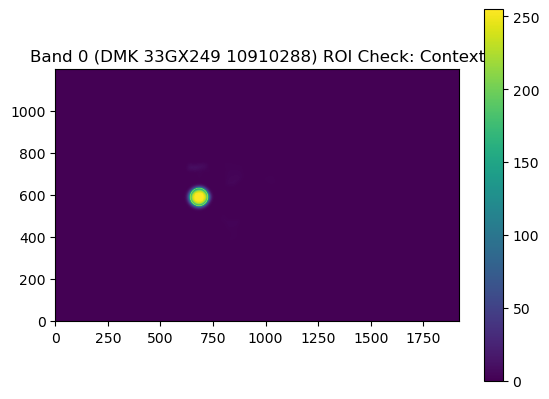

Imaging with Exposure: 0.023031000047922134 s
+Good exposure 0.023031000047922134 Image recieved


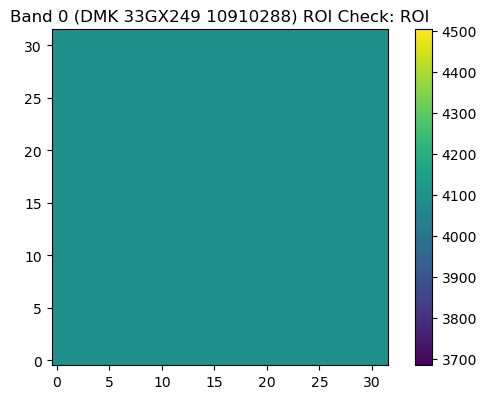

-----------------------------------
-----------------------------------
Device 1 (DMK 33GX249 10910273)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 487.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 7.986242299794661 x 487.0 = 3889.2999999999997
Exposure set to 0.015971999615430832 (err of 4.85742810800438e-07
Trial 1:
Imaging with Exposure: 0.015971999615430832 s
+Good exposure 0.015971999615430832 Image recieved
Quantile: 3880.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.015971999615430832
Imaging with Exposure: 0.015971999615430832 s
+Good exposure 0.015971999615430832 Image recieved
x: 254
y: 674


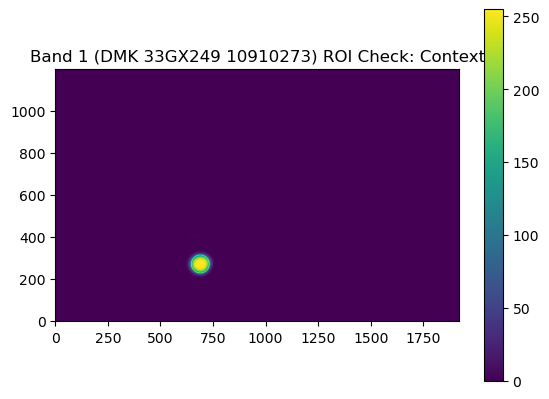

Imaging with Exposure: 0.015971999615430832 s
+Good exposure 0.015971999615430832 Image recieved


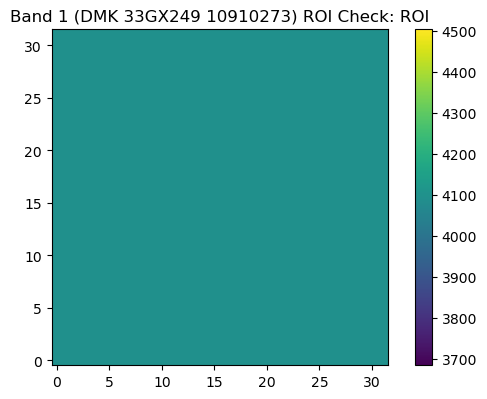

-----------------------------------
-----------------------------------
Device 2 (DMK 33GX249 10910289)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 73.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 266.3904109589041 x 14.6 = 3889.2999999999997
Exposure set to 0.5327799916267395 (err of 8.555967998535863e-07
Trial 1:
Imaging with Exposure: 0.5327799916267395 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.5327799916267395 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.5327799916267395
Expected new quantile: 0.18999999999999997 x 20470.0 = 3889.2999999999993
Exposure set to 0.10122799873352051 (err of 1.9967555998923192e-07
Trial 2:
Imagin

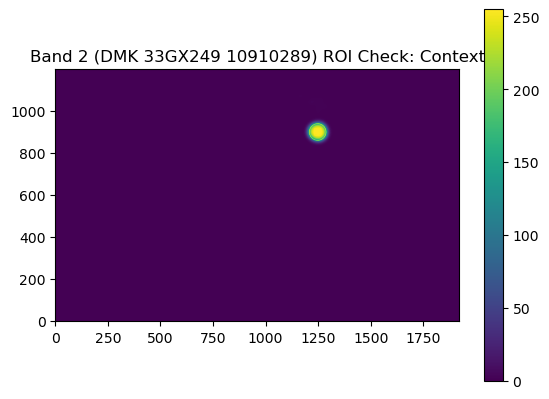

Imaging with Exposure: 0.10592000186443329 s
+Good exposure 0.10592000186443329 Image recieved


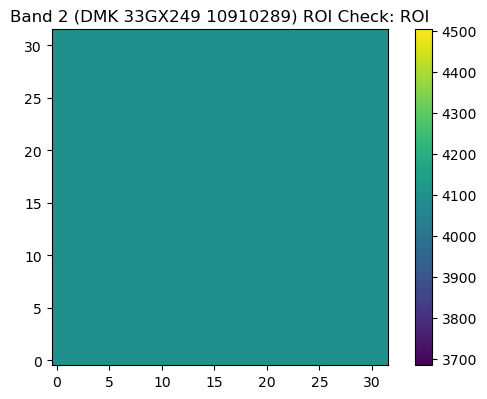

-----------------------------------
-----------------------------------
Device 3 (DMK 33GX249 10910294)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 71.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 273.8943661971831 x 14.2 = 3889.2999999999997
Exposure set to 0.5477880239486694 (err of 7.344642654061317e-07
Trial 1:
Imaging with Exposure: 0.5477880239486694 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.5477880239486694 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.5477880239486694
Expected new quantile: 0.18999999999999997 x 20470.0 = 3889.2999999999993
Exposure set to 0.1040790006518364 (err of 7.238984107843516e-07
Trial 2:
Imaging 

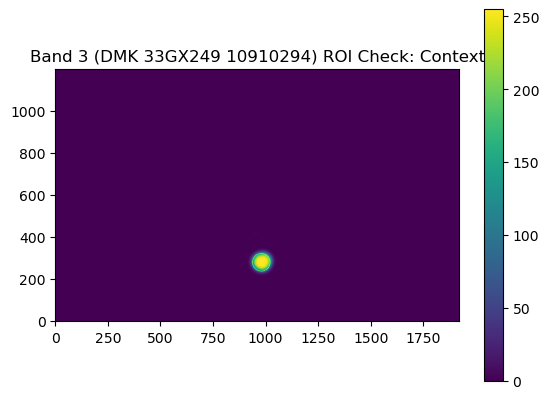

Imaging with Exposure: 0.10811799764633179 s
+Good exposure 0.10811799764633179 Image recieved


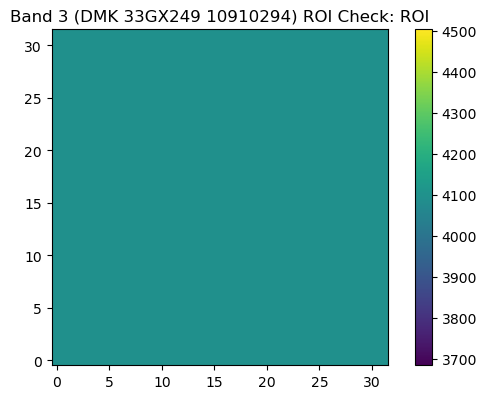

-----------------------------------
-----------------------------------
Device 4 (DMK 33GX249 10910291)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 2871.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 1.3546847788227097 x 2871.0 = 3889.2999999999993
Exposure set to 0.0027089999057352543 (err of 3.697805983134822e-07
Trial 1:
Imaging with Exposure: 0.0027089999057352543 s
+Good exposure 0.0027089999057352543 Image recieved
Quantile: 3866.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.0027089999057352543
Imaging with Exposure: 0.0027089999057352543 s
+Good exposure 0.0027089999057352543 Image recieved
x: 586
y: 1218


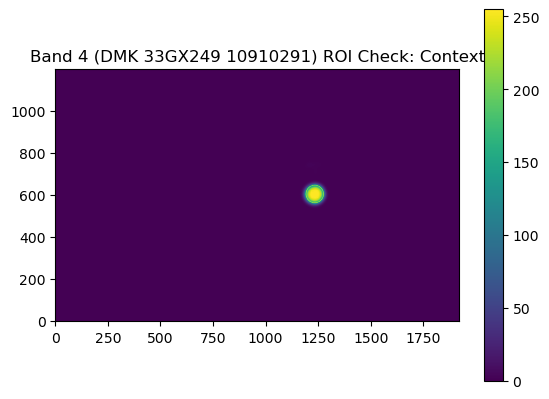

Imaging with Exposure: 0.0027089999057352543 s
+Good exposure 0.0027089999057352543 Image recieved


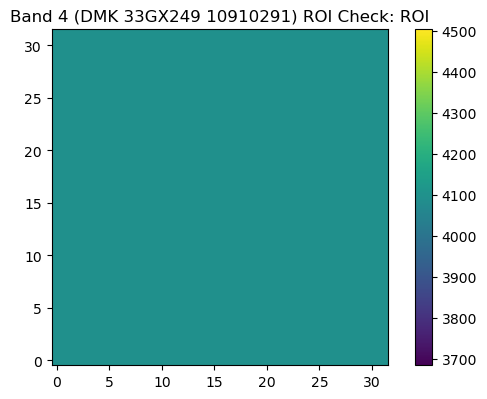

-----------------------------------
-----------------------------------
Device 5 (DMK 33GX249 10910295)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 61.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 318.7950819672131 x 12.2 = 3889.2999999999997
Exposure set to 0.6375899910926819 (err of 2.0312565207625255e-07
Trial 1:
Imaging with Exposure: 0.6375899910926819 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.6375899910926819 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.6375899910926819
Expected new quantile: 0.18999999999999997 x 20470.0 = 3889.2999999999993
Exposure set to 0.12114199995994568 (err of 9.834766385996563e-08
Trial 2:
Imagin

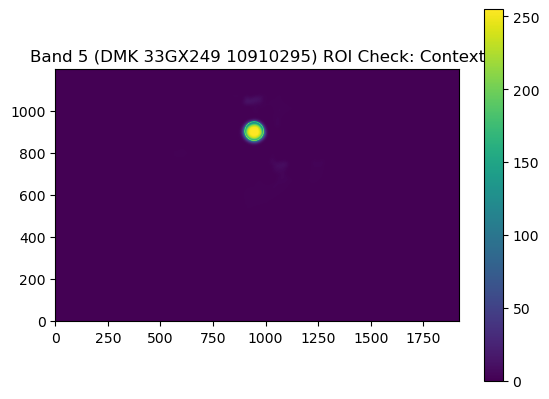

Imaging with Exposure: 0.12471000105142593 s
+Good exposure 0.12471000105142593 Image recieved


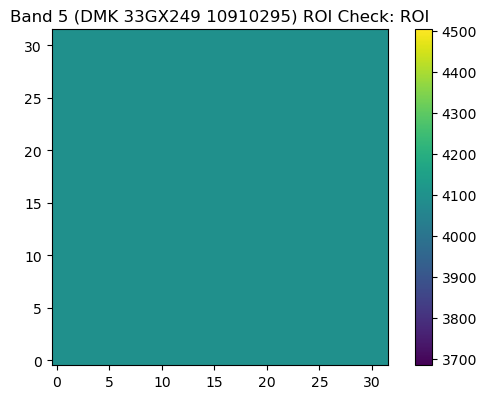

-----------------------------------
-----------------------------------
Device 7 (DMK 33GX249 23120778)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1600.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 2.4308125 x 1600.0 = 3889.3
Exposure set to 0.004860999993979931 (err of 6.25236934865582e-07
Trial 1:
Imaging with Exposure: 0.004860999993979931 s
+Good exposure 0.004860999993979931 Image recieved
Quantile: 3859.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.004860999993979931
Imaging with Exposure: 0.004860999993979931 s
+Good exposure 0.004860999993979931 Image recieved
x: 870
y: 620


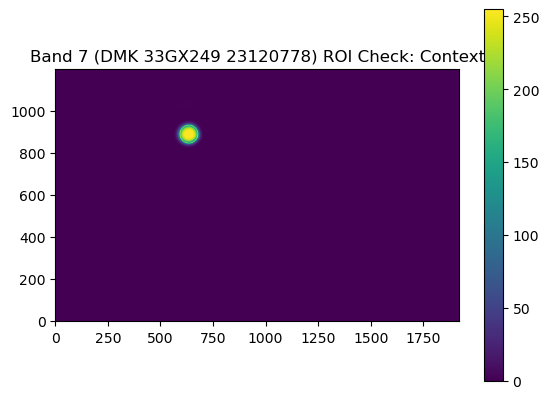

Imaging with Exposure: 0.004860999993979931 s
+Good exposure 0.004860999993979931 Image recieved


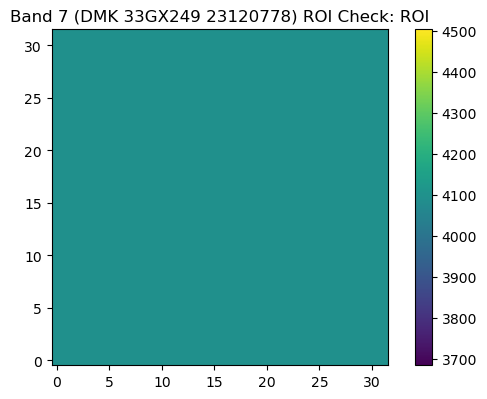

-----------------------------------
-----------------------------------
Device 6 (DMK 33GX249 10910265)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 762.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 5.1040682414698155 x 762.0 = 3889.2999999999993
Exposure set to 0.010208000428974628 (err of 1.3653882546815765e-07
Trial 1:
Imaging with Exposure: 0.010208000428974628 s
+Good exposure 0.010208000428974628 Image recieved
Quantile: 3878.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.010208000428974628
Imaging with Exposure: 0.010208000428974628 s
+Good exposure 0.010208000428974628 Image recieved
x: 246
y: 1234


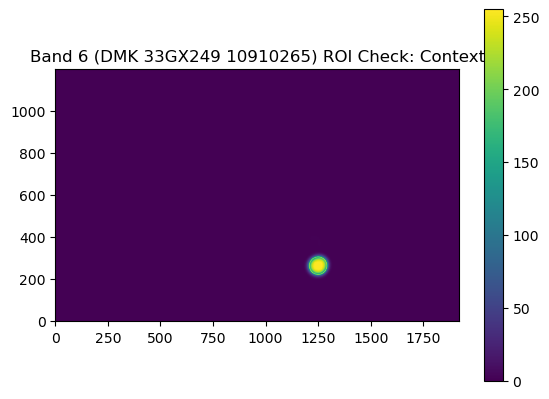

Imaging with Exposure: 0.010208000428974628 s
+Good exposure 0.010208000428974628 Image recieved


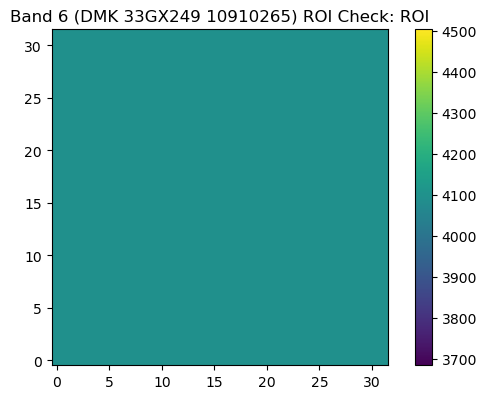

-----------------------------------


In [5]:
cameras = osc.find_camera_rois(connected_cameras, roi_size=32)

# Setting the F-Number

To set our cameras for the given f-numbers, we need to:
- set the lens ring f-number to the minimum of f/1.4
- establish all camera have same throughput at f/1.4
- get the exposure required to image the reflectance target to a given exposure (approx. 3700 DN) with high precision
- compute the exposure required to achieve the same level for the target f-number
- repeatedly adjust the ring until the value has been met.

In [ ]:
osc.check_f_numbers(connected_cameras)

In [9]:
osc.set_f_numbers_by_exp(connected_cameras[5:])

-----------------------------------
Device 5
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Quantile: 5.0, Target: 3275.2000000000003
Exposure current Value: 5.999999848427251e-05
Expected new quantile: 3275.2000000000003 x 1.0 = 3275.2000000000003
Exposure set to 0.19651100039482117 (err of 9.946408681682506e-07
Trial 1:
Imaging with Exposure: 0.19651100039482117 s
+Good exposure 0.19651100039482117 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.19651100039482117
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.03144099935889244 (err of 7.607042789431473e-07
Trial 2:
Imaging with Exposure: 0.03144099935889244 s
+Good exposure 0.03144099935889244 Image recieved
Quantile: 1706.0, Target: 3275.2000000000003
Exposure current Value: 0.03144099935889244
Expected new quantile: 1.9198124267291912 x 1706.0 = 3275.

KeyboardInterrupt: 

# Set Focus

In [ ]:
osc.set_focus(connected_cameras)